In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Generar valores validos de precipitación para enero en Buenos Aires
valores_validos = np.random.randint(low=200, high=300, size=120)

# Generar valores atípicos de precipitración por arriba
outliers_superiores = np.random.randint(low=400, high=500, size=5)

# Generar valores atípicos de precipitación por debajo
outliers_inferiores = np.random.randint(low=10, high=50, size=5)

# Combinar los valores validos y atípicos
data_pp = np.concatenate((valores_validos, outliers_superiores, outliers_inferiores))

# Crear un DataFrame con los datos
df_precipitacion = pd.DataFrame(data_pp, columns=['Precipitación(mm)'])

# Ordenar los valores de forma descendente
df_precipitacion = df_precipitacion.sort_values(by='Precipitación(mm)', ascending=False)

df_precipitacion.head(5)


,Precipitación(mm)
124,466
121,465
122,464
120,454
123,415


EDA: shape, info, describe, head, corr, duplicados

In [ ]:
df_precipitacion.describe()

,Precipitación(mm)
count,130.00000
mean,248.20000
std,64.83245
min,12.00000
25%,224.00000
50%,250.00000
75%,272.75000
max,481.00000


In [3]:

# Generar valores validos de temperatura
valores_validos = np.random.uniform(low=25, high=30, size=120)

# Generar valores atípicos de temperatura por arriba
outliers_superiores = np.random.uniform(low=50, high=70, size=5)

# Generar valores atípicos de temperatura por debajo
outliers_inferiores = np.random.uniform(low=0, high=10, size=5)

# Combinar los valores validos y atípicos
data_temp = np.concatenate((valores_validos, outliers_superiores, outliers_inferiores))

# Crear un DataFrame con los datos
df_temperatura = pd.DataFrame(data_temp, columns=['Temperatura(°C)'])

# Ordenar los valores de forma descendente
df_temperatura= df_temperatura.sort_values(by='Temperatura(°C)', ascending=False)

df_temperatura.head()

,Temperatura(°C)
123,66.680878
121,60.515573
120,57.963838
122,53.685786
124,52.458343


In [7]:
df_temperatura.describe().round(0).astype(int)

,Temperatura(°C)
count,130
mean,28
std,8
min,0
25%,26
50%,28
75%,29
max,67


In [10]:
# uniendo los 2 dataframes

df= pd.concat([df_precipitacion, df_temperatura], axis=1).reset_index()
df.drop('index', axis=1, inplace=True)
df=df.astype(int)
df

,Precipitación(mm),Temperatura(°C)
0,466,52
1,465,60
2,464,53
3,454,57
4,415,66
...,...,...
125,48,4
126,29,1
127,25,0
128,21,2


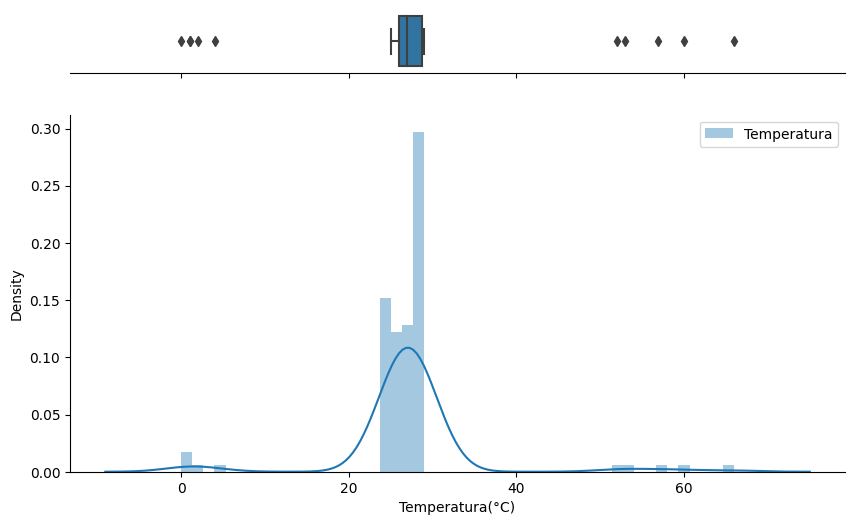

In [11]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['Temperatura(°C)'], ax=ax_box, orient="h")
sns.distplot(df['Temperatura(°C)'], ax=ax_hist, label='Temperatura')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

#La prueba de Kolmogorov-Smirnov
es una prueba no paramétrica, que permite medir el grado de ajuste existente entre la distribución del conjunto de
datos analizados y una distribución normal. Su objetivo es validar que los datos
provienen de una población que tiene la distribución teórica especificada, es decir,
contrasta si las observaciones podrían razonablemente proceder de una
distribución gaussiana.
Con esta prueba se contrastó el nivel de significancia, si el p-value es
menor que 0,05 la distribución no es normal y si es mayor que 0,05 la distribución
se ajusta a la normal

In [12]:
from scipy.stats import kstest


# Realizar el test de Kolmogorov-Smirnov en la data de temperatura
# Se asume la distribución normal estándar como distribución de referencia
p_value = kstest(data_temp, 'norm')

# Imprimir los resultados

print('Valor p:', p_value)

Valor p: KstestResult(statistic=0.9692149346322156, pvalue=6.098744053116421e-197, statistic_location=4.161119020956958, statistic_sign=-1)


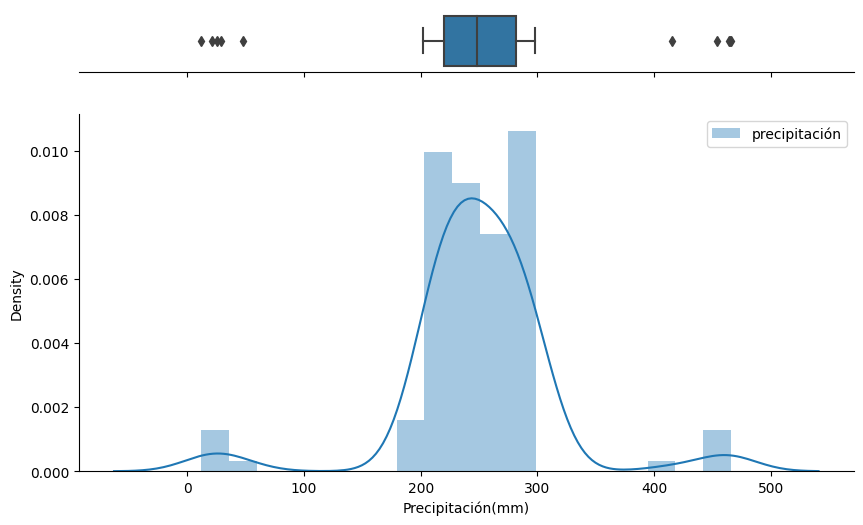

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['Precipitación(mm)'], ax=ax_box, orient="h") # boxplot es diagrama de cajas
sns.distplot(df['Precipitación(mm)'], ax=ax_hist, label='precipitación')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [14]:
# Realizar el test de Kolmogorov-Smirnov en la data de precipitación
# Se asume la distribución normal estándar como distribución de referencia
p_value = kstest(data_pp, 'norm')

# Imprimir los resultados

print('Valor p:', p_value)

Valor p: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12, statistic_sign=-1)


In [15]:
# generemos una distribución de datos que siga la normal

# Ejemplo de uso
media = 0
desviacion_estandar = 1
tamaño = 1000

valores_normales =np.random.normal(loc=media, scale=desviacion_estandar, size=tamaño)

D, p_value = kstest(valores_normales, 'norm')

# Imprimir los resultados

print('Valor p:', p_value)

Valor p: 0.6252685928511208


Recordar: Si el valor p es menor que un nivel de significancia predefinido (por ejemplo, 0.05), podemos rechazar la hipótesis nula de que los datos siguen una distribución normal. En caso contrario, no tenemos suficiente evidencia para rechazar la hipótesis nula y podemos considerar que los datos siguen una distribución normal.

#Estandarizar una variable

Estandarizar una variable: significa transformarla para que tenga una media de cero y una desviación estándar de uno. Este proceso se utiliza a menudo en análisis de datos y aprendizaje automático para normalizar las variables y facilitar su comparación.

La estandarización se realiza al restar la media de la variable a cada valor de la variable y luego dividir el resultado por la desviación estándar. La fórmula para estandarizar una variable X es: X_estandarizado = (X - media(X)) / desviacion_estandar(X)

Después de estandarizar la variable X, todos los valores se encuentran en la misma escala y se pueden comparar fácilmente entre sí. Además, al estandarizar las variables, se pueden evitar posibles problemas de interpretación de los resultados debido a diferencias en las unidades de medida o escalas de las variables.

image.png


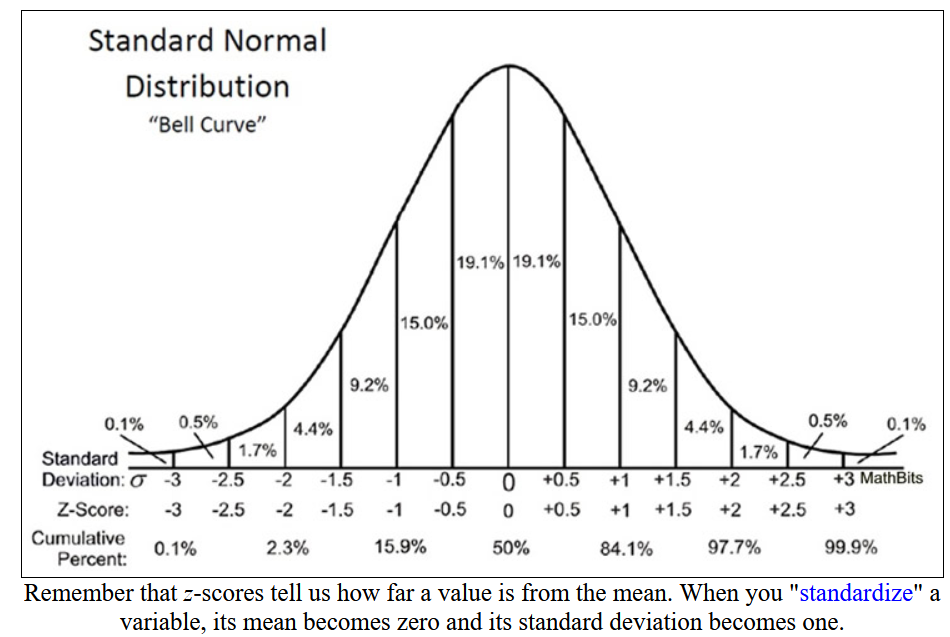

In [16]:
# variable objetivo Temperatura


# Calculamos el z-score
df['Temperatura_z'] = (df['Temperatura(°C)'] - df['Temperatura(°C)'].mean())/df['Temperatura(°C)'].std()
# Creamos una variable para marcar los outliers
df['Temperaturas_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['Temperatura_z']>3)|(df['Temperatura_z']<-3) , 'Temperaturas_outliers'] = 1
# Veamos los resultados
df[['Temperatura(°C)', 'Temperatura_z','Temperaturas_outliers']]

,Temperatura(°C),Temperatura_z,Temperaturas_outliers
0,52,3.086367,1
1,60,4.083826,1
2,53,3.211050,1
3,57,3.709779,1
4,66,4.831920,1
...,...,...,...
125,4,-2.898385,0
126,1,-3.272432,1
127,0,-3.397114,1
128,2,-3.147749,1


In [17]:
# Veamos los casos marcados
df['Temperaturas_outliers'].value_counts()

0    121
1      9
Name: Temperaturas_outliers, dtype: int64

Asumiendo que los datos tienen una distribución normal (curva con forma de campana), Media +/- 3*DS (Desviación estándar) capturará el 99,7 % de las observaciones. Desde el punto de vista estadístico, cualquier valor que quede fuera de este rango se considera una anomalía. Pero en este caso sabemos que no se cumple esa suposición...

eliminar los valores físicamente imposibles antes de detectar outliers es una buena práctica en el proceso de detección de anomalías. Esto se debe a que algunos valores pueden ser claramente incorrectos o inconsistentes con el dominio del problema, lo que indica que se trata de errores en los datos en lugar de valores atípicos genuinos.

Antes de aplicar técnicas más avanzadas de detección de outliers, como el cálculo de z-scores o el uso de métodos estadísticos o de aprendizaje automático, es recomendable realizar una validación básica de los datos para eliminar valores que sean físicamente imposibles.

Por ejemplo, en el contexto de los pesos de una persona, podrías eliminar valores negativos, valores iguales a cero o valores extremadamente altos o bajos que no sean realistas para el dominio específico.

Una vez que hayas eliminado estos valores físicamente imposibles, puedes proceder con técnicas más sofisticadas de detección de outliers para identificar patrones inusuales o anómalos en los datos restantes. Esto ayudará a mejorar la calidad de los resultados y a obtener una detección más precisa de las anomalías en tus datos.

In [18]:
# variable objetivo Precipitación


# Calculamos el z-score
df['Precipitación_z'] = (df['Precipitación(mm)'] - df['Precipitación(mm)'].mean())/df['Precipitación(mm)'].std()
# Creamos una variable para marcar los outliers
df['Precipitacións_outliers'] = 0
# Usamos una condicion para marcar los outliers
# tienen que tener un z-score > 3 o <-3
df.loc[(df['Precipitación_z']>3)|(df['Precipitación_z']<-3) , 'Precipitacións_outliers'] = 1
# Veamos los resultados
df[['Precipitación(mm)', 'Precipitación_z','Precipitacións_outliers']]

,Precipitación(mm),Precipitación_z,Precipitacións_outliers
0,466,3.272841,1
1,465,3.257713,1
2,464,3.242585,1
3,454,3.091307,1
4,415,2.501323,0
...,...,...,...
125,48,-3.050578,1
126,29,-3.338007,1
127,25,-3.398518,1
128,21,-3.459029,1


In [19]:
# Veamos los casos marcados
df['Precipitacións_outliers'].value_counts()

0    121
1      9
Name: Precipitacións_outliers, dtype: int64

# ¿Por qué detectamos valores outliers sino es normal la distribución?

El teorema central del límite es uno de los resultados fundamentales de la estadística. Este teorema nos dice que si una muestra es lo bastante grande (generalmente cuando el tamaño muestral (n) supera los 30), la distribución de la media muestral, seguirá "aproximadamente" una distribución normal.

Revisar más en https://www.revistaseden.org/files/8-CAP%208.pdf

En el caso de una distribución con más de 30 elementos, la distribución de la media muestral solo se aproximará a una distribución normal si la distribución de la población es relativamente normal. Si la distribución de la población es muy sesgada o tiene una cola larga, la distribución de la media muestral no se aproximará muy bien a una distribución normal

Por lo tanto, es importante tener cuidado al asumir la normalidad en una distribución con muchos elementos. Siempre es recomendable realizar un test de normalidad...

# Otra forma alternativa para detectar los outliers basado en percentiles, sin tomar en cuentra la distribución:

In [20]:
p99 = df['Precipitación(mm)'].quantile(0.99)
p1 = df['Precipitación(mm)'].quantile(0.01)

outliers = df[(df['Precipitación(mm)'] > p99) | (df['Precipitación(mm)'] < p1)]

outliers

,Precipitación(mm),Temperatura(°C),Temperatura_z,Temperaturas_outliers,Precipitación_z,Precipitacións_outliers
0,466,52,3.086367,1,3.272841,1
1,465,60,4.083826,1,3.257713,1
128,21,2,-3.147749,1,-3.459029,1
129,12,1,-3.272432,1,-3.595179,1


In [21]:
p99 = df['Temperatura(°C)'].quantile(0.99)
p1 = df['Temperatura(°C)'].quantile(0.01)

outliers = df[(df['Temperatura(°C)'] > p99) | (df['Temperatura(°C)'] < p1)]

outliers

,Precipitación(mm),Temperatura(°C),Temperatura_z,Temperaturas_outliers,Precipitación_z,Precipitacións_outliers
1,465,60,4.083826,1,3.257713,1
4,415,66,4.831920,1,2.501323,0
127,25,0,-3.397114,1,-3.398518,1


In [22]:
df[(df['Temperatura(°C)'] > p99) | (df['Temperatura(°C)'] < p1)|(df['Temperaturas_outliers']==1)]

,Precipitación(mm),Temperatura(°C),Temperatura_z,Temperaturas_outliers,Precipitación_z,Precipitacións_outliers
0,466,52,3.086367,1,3.272841,1
1,465,60,4.083826,1,3.257713,1
2,464,53,3.211050,1,3.242585,1
3,454,57,3.709779,1,3.091307,1
4,415,66,4.831920,1,2.501323,0
126,29,1,-3.272432,1,-3.338007,1
127,25,0,-3.397114,1,-3.398518,1
128,21,2,-3.147749,1,-3.459029,1
129,12,1,-3.272432,1,-3.595179,1


es importante destacar que determinar si un valor es un outlier o no depende del contexto y del dominio del problema. No todos los valores que caen fuera del rango del p1 y el p99 son necesariamente outliers, ya que en algunos casos pueden ser valores legítimos y válidos para el problema en cuestión.

Por lo tanto, el uso del p99 y el p1 como métricas para detectar outliers debe ser combinado con otras técnicas y consideraciones, como el análisis del dominio, el conocimiento experto y posibles reglas de negocio, para tomar decisiones más precisas sobre qué valores considerar como outliers.

In [24]:
data = pd.DataFrame({
    'Color': ['Rojo', 'Verde', 'Azul', 'Rojo', 'Verde', 'Azul', "Verde"],
    'Tamaño': ['Pequeño', 'Mediano', 'Grande', 'Pequeño', 'Mediano', 'Grande', "Mediano"],
    'Valor': [10, 20, 30, 1000, 40, 50,-200]
})

data.head(10)

,Color,Tamaño,Valor
0,Rojo,Pequeño,10
1,Verde,Mediano,20
2,Azul,Grande,30
3,Rojo,Pequeño,1000
4,Verde,Mediano,40
5,Azul,Grande,50
6,Verde,Mediano,-200


In [25]:
from sklearn.preprocessing import OneHotEncoder

# Codificar las variables categóricas utilizando one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[['Color', 'Tamaño']])
encoded_data

array([[0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0.]])

In [26]:
encoder.categories_

[array(['Azul', 'Rojo', 'Verde'], dtype=object),
 array(['Grande', 'Mediano', 'Pequeño'], dtype=object)]

In [27]:
encoded_columns= np.concatenate((encoder.categories_[0], encoder.categories_[1]))
encoded_columns

array(['Azul', 'Rojo', 'Verde', 'Grande', 'Mediano', 'Pequeño'],
      dtype=object)

In [ ]:
# es lo mismo que antes, otro camino...

encoded_columns = []
for feature in encoder.categories_:
    encoded_columns.extend(feature)
encoded_columns

['Azul', 'Rojo', 'Verde', 'Grande', 'Mediano', 'Pequeño']

In [28]:
# Agregar las variables codificadas al dataset
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
encoded_data = pd.concat([encoded_df, data['Valor']], axis=1)

df=encoded_data
df

,Azul,Rojo,Verde,Grande,Mediano,Pequeño,Valor
0,0.0,1.0,0.0,0.0,0.0,1.0,10
1,0.0,0.0,1.0,0.0,1.0,0.0,20
2,1.0,0.0,0.0,1.0,0.0,0.0,30
3,0.0,1.0,0.0,0.0,0.0,1.0,1000
4,0.0,0.0,1.0,0.0,1.0,0.0,40
5,1.0,0.0,0.0,1.0,0.0,0.0,50
6,0.0,0.0,1.0,0.0,1.0,0.0,-200


In [29]:
df.corr

<bound method DataFrame.corr of    Azul  Rojo  Verde  Grande  Mediano  Pequeño  Valor
0   0.0   1.0    0.0     0.0      0.0      1.0     10
1   0.0   0.0    1.0     0.0      1.0      0.0     20
2   1.0   0.0    0.0     1.0      0.0      0.0     30
3   0.0   1.0    0.0     0.0      0.0      1.0   1000
4   0.0   0.0    1.0     0.0      1.0      0.0     40
5   1.0   0.0    0.0     1.0      0.0      0.0     50
6   0.0   0.0    1.0     0.0      1.0      0.0   -200>

In [31]:
q1 = np.percentile(df['Valor'], 25)
q3 = np.percentile(df['Valor'], 75)
iqr = q3 - q1#medio percentil 50

In [32]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [33]:
outliers = df[(df['Valor'] < limite_inferior) | (df['Valor'] > limite_superior)]
outliers

,Azul,Rojo,Verde,Grande,Mediano,Pequeño,Valor
3,0.0,1.0,0.0,0.0,0.0,1.0,1000
6,0.0,0.0,1.0,0.0,1.0,0.0,-200


leer material complementario https://es.wikipedia.org/wiki/Valor_at%C3%ADpico

Ejemplo sobre LabelEncoder https://interactivechaos.com/es/python/function/labelencoder